# Explore here

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np



# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

# Save the DataFrame to a CSV file in your project directory
df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [25]:
print(df.head())
print(df.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)


In [26]:
print(df.isnull().sum())

print(df['region'].value_counts())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df_1 =df.copy()

In [41]:
print(df_1.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [42]:
#going to change the categorical data to numerical data- just three columns

df_1['sex'] = df_1['sex'].map({'female':0, 'male':1})
df_1['smoker'] = df_1['smoker'].map({'no':0, 'yes':1})
df_1['region'] = df_1['region'].map({'southwest': 0, 'southeast':1, 'northwest':2, 'northeast':3})

In [43]:
print(df_1.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520


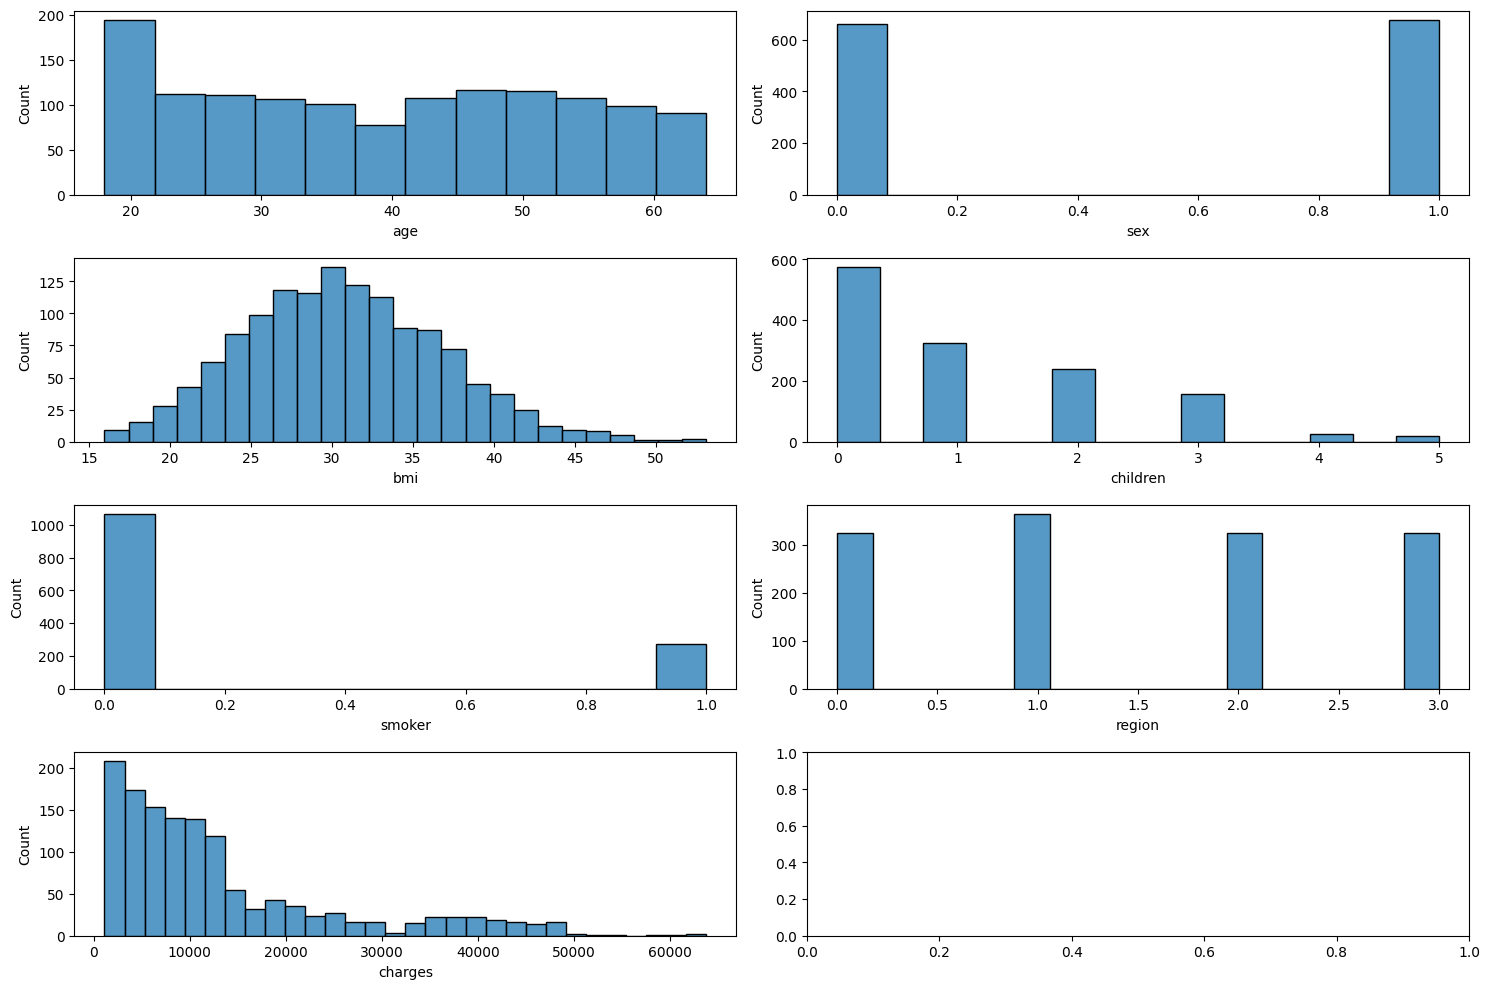

In [47]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

sns.histplot(ax=axes[0, 0], data=df_1, x='age')
sns.histplot(ax=axes[0, 1], data=df_1, x='sex')
sns.histplot(ax=axes[1, 0], data=df_1, x='bmi')
sns.histplot(ax=axes[1, 1], data=df_1, x='children')
sns.histplot(ax=axes[2, 0], data=df_1, x='smoker')
sns.histplot(ax=axes[2, 1], data=df_1, x='region')
sns.histplot(ax=axes[3, 0], data=df_1, x='charges')

plt.tight_layout()
plt.show()


In [49]:
#going to remove region


df_2 = df_1.drop(['region'], axis=1)

In [50]:
print(df_2.head())

   age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       1  16884.92400
1   18    1  33.770         1       0   1725.55230
2   28    1  33.000         3       0   4449.46200
3   33    1  22.705         0       0  21984.47061
4   32    1  28.880         0       0   3866.85520


<Axes: >

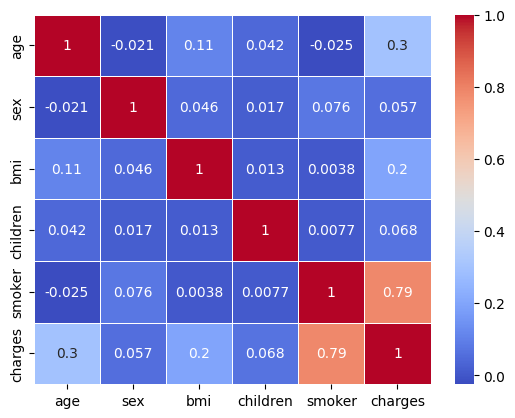

In [51]:
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_2.drop(['charges'], axis=1) ,df_2['charges'], test_size=0.2)

In [59]:
print(X_train.head())
print(y_train.head())

      age  sex    bmi  children  smoker
511    27    1  33.66         0       0
663    18    1  33.66         0       0
225    55    1  33.88         3       0
1006   28    1  29.26         2       0
29     31    1  36.30         2       1
511      2498.4144
663      1136.3994
225     11987.1682
1006     4438.2634
29      38711.0000
Name: charges, dtype: float64


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
print(f"Intercept (a): {model.intercept_}") 
print(f"Coefficients (b): {model.coef_}")   

Intercept (a): -12229.443851012464
Coefficients (b): [  253.96892166  -176.73699657   339.85020896   451.66876397
 23555.66964093]


In [62]:
y_pred = model.predict(X_test)
y_pred 

array([12111.60636334,  9288.31428611, 10448.19954053, 17373.17058291,
       11125.0800669 ,  8589.36245306, 11155.26003906, 27382.47464665,
       13182.03014731, 16825.16347512, 10752.95897599,  6510.80045267,
        7210.5328017 ,  6906.17306981, 15140.64603607,  7685.52084728,
        7831.74585774,  9633.07529642,  9169.16758161,  7441.98191465,
       10869.04603543, 37063.14162805,  -639.3308179 ,  9997.14456515,
       30843.43436773,  8157.18769755,  7704.91048148,  4064.99147806,
        4802.97584584, 25388.74909325,  9476.44069467, 13222.31493764,
       10953.44215671,  5959.73092573, 13997.18830198,  4449.92606134,
       31183.66532336, 16495.17675848, 14821.75867285,  5695.16672848,
       14805.28512814,  3469.3199894 ,  6861.14834028, 10335.75764551,
       36374.14955101, 16584.36712726,  6877.77499197,  1930.87038484,
        8179.22916267, 16910.11113945, 26930.47386873,  3152.35544792,
        5376.00292711, 36163.1470264 ,  9267.7092543 ,  6050.20588833,
      

In [63]:
y_pred.shape

(268,)

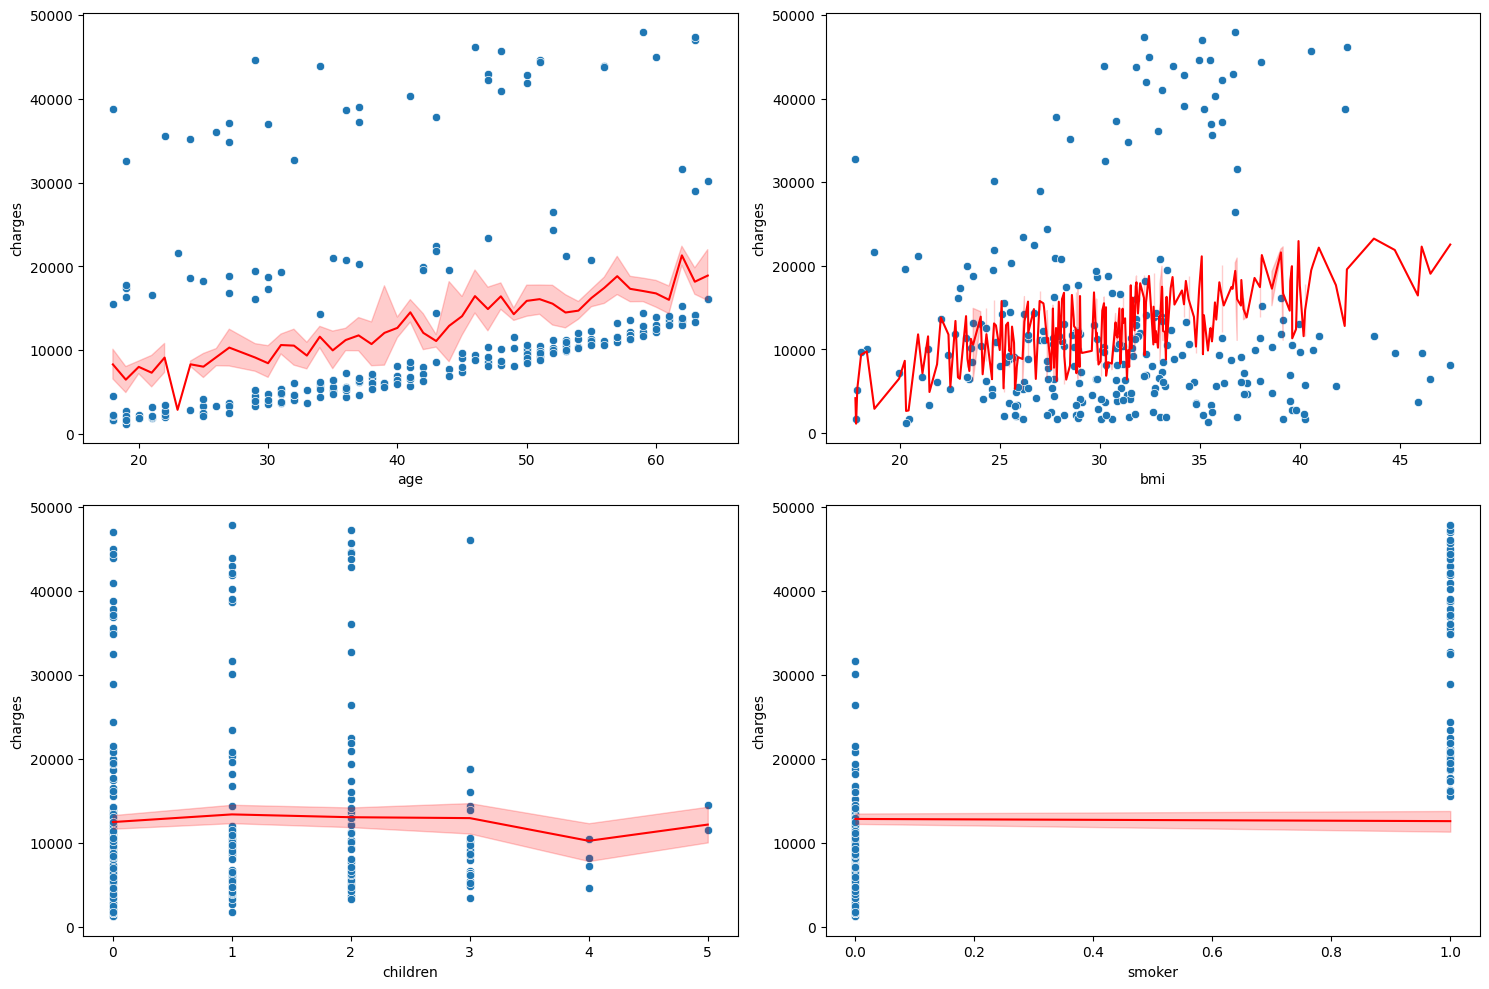

In [75]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))
df_2 = pd.concat([X_test, y_test], axis=1)

regression_equation = lambda x: -12229.443851012464 + 253.96892166 * x['age'] + 322.073366 * x['sex'] + 478.682 * x['bmi'] - 238.5 * x['children'] + 238.5 * x['smoker']

sns.scatterplot(ax=axis[0, 0], data=df_2, x='age', y='charges')
sns.lineplot(ax=axis[0, 0], x=df_2['age'], y=regression_equation(df_2), color='red')
sns.scatterplot(ax=axis[0, 1], data=df_2, x='bmi', y='charges')
sns.lineplot(ax=axis[0, 1], x=df_2['bmi'], y=regression_equation(df_2), color='red')
sns.scatterplot(ax=axis[1, 0], data=df_2, x='children', y='charges')
sns.lineplot(ax=axis[1, 0], x=df_2['children'], y=regression_equation(df_2), color='red')
sns.scatterplot(ax=axis[1, 1], data=df_2, x='smoker', y='charges')
sns.lineplot(ax=axis[1, 1], x=df_2['smoker'], y=regression_equation(df_2), color='red')


plt.tight_layout()

plt.show()
                                                              

In [76]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 26530660.634973902
Coefficient of determination: 0.8038273849868871
